In [1]:
import mxnet as mx 
import matplotlib.pyplot as plt 
import numpy as np
%pylab inline
pylab.rcParams['figure.figsize'] = (2, 3)

Populating the interactive namespace from numpy and matplotlib


DataBatch: data shapes: [(128L, 3L, 28L, 28L)] label shapes: [(128L,)]
DataBatch: data shapes: [(128L, 3L, 28L, 28L)] label shapes: [(128L,)]
DataBatch: data shapes: [(128L, 3L, 28L, 28L)] label shapes: [(128L,)]
DataBatch: data shapes: [(128L, 3L, 28L, 28L)] label shapes: [(128L,)]
DataBatch: data shapes: [(128L, 3L, 28L, 28L)] label shapes: [(128L,)]
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


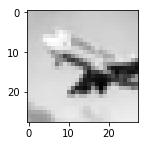

In [8]:
# Step 1 data
# input data debug
data_iter = mx.io.ImageRecordIter(
    path_imgrec = 'data/cifar10_train.rec',
    data_shape = (3,28,28),
    label_width = 1,
    batch_size = 128
)
print (data_iter)
i = 0
for each in data_iter:
    i+=1
    if i>5:
        break
    print each
batch_numpy = each.data[0].asnumpy()
label_numpy = each.label[0].asnumpy()
print (type(batch_numpy))
print (type(label_numpy))

#show img
randidx = np.random.randint(0,128)
img = batch_numpy[randidx]
img = np.squeeze(img).sum(axis=0)
plt.imshow(img, cmap='gray')
plt.show()

['data', 'bn_data_gamma', 'bn_data_beta', 'conv0_weight', 'stage1_unit1_bn1_gamma', 'stage1_unit1_bn1_beta', 'stage1_unit1_conv1_weight', 'stage1_unit1_bn2_gamma', 'stage1_unit1_bn2_beta', 'stage1_unit1_conv2_weight', 'stage1_unit1_sc_weight', 'stage1_unit2_bn1_gamma', 'stage1_unit2_bn1_beta', 'stage1_unit2_conv1_weight', 'stage1_unit2_bn2_gamma', 'stage1_unit2_bn2_beta', 'stage1_unit2_conv2_weight', 'stage1_unit3_bn1_gamma', 'stage1_unit3_bn1_beta', 'stage1_unit3_conv1_weight', 'stage1_unit3_bn2_gamma', 'stage1_unit3_bn2_beta', 'stage1_unit3_conv2_weight', 'stage2_unit1_bn1_gamma', 'stage2_unit1_bn1_beta', 'stage2_unit1_conv1_weight', 'stage2_unit1_bn2_gamma', 'stage2_unit1_bn2_beta', 'stage2_unit1_conv2_weight', 'stage2_unit1_sc_weight', 'stage2_unit2_bn1_gamma', 'stage2_unit2_bn1_beta', 'stage2_unit2_conv1_weight', 'stage2_unit2_bn2_gamma', 'stage2_unit2_bn2_beta', 'stage2_unit2_conv2_weight', 'stage2_unit3_bn1_gamma', 'stage2_unit3_bn1_beta', 'stage2_unit3_conv1_weight', 'stage2_un

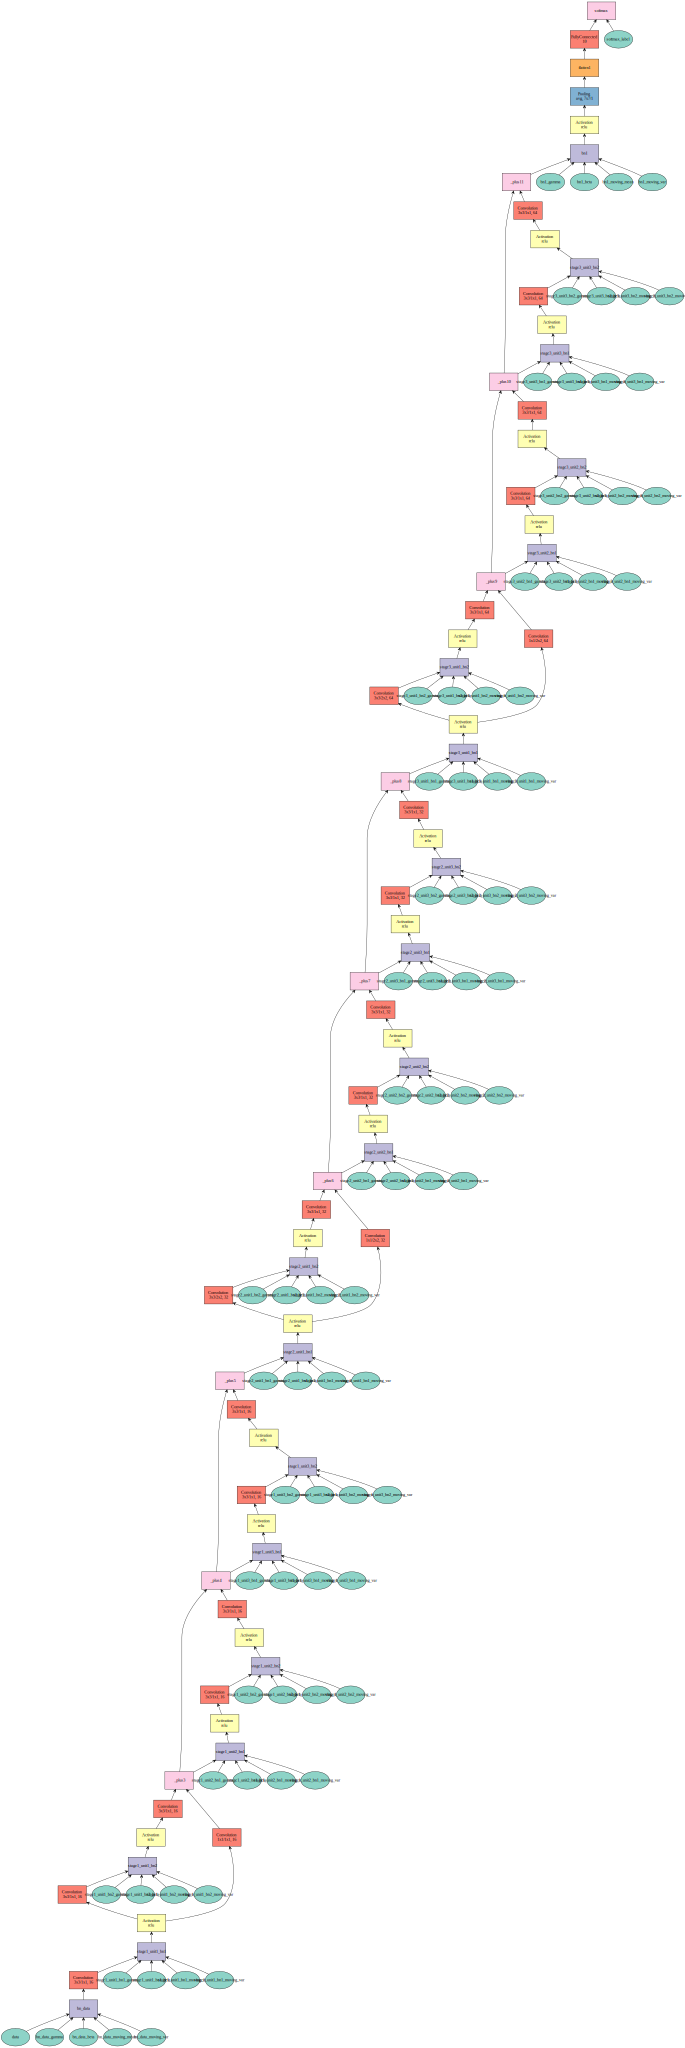

In [9]:
# debug model
from importlib import import_module
net = import_module('symbols.'+'resnet')
sym = net.get_symbol(10,20,"3,28,28")
model_prefix = 'cifar10_resnet'
#check_point = mx.callback.do_checkpoint(model_prefix)
arg_name = sym.list_arguments()
out_name = sym.list_outputs()
print (arg_name)
print (out_name)
mx.viz.plot_network(sym,hide_weights=True,save_format='pdf',title='resnet8')

Help on function ImageRecordIter in module mxnet.io:

ImageRecordIter(*args, **kwargs)
    Iterating on image RecordIO files
    
    Read images batches from RecordIO files with a rich of data augmentation
    options.
    
    One can use ``tools/im2rec.py`` to pack individual image files into RecordIO
    files.
    
    
    
    Defined in src/io/iter_image_recordio_2.cc:L568
    
    Parameters
    ----------
    path_imglist : string, optional, default=''
        Path to the image list file
    path_imgrec : string, optional, default=''
        Filename of the image RecordIO file or a directory path.
    aug_seq : string, optional, default='aug_default'
        The augmenter names to represent sequence of augmenters to be applied, seperated by comma. Additional keyword parameters will be seen by these augmenters.
    label_width : int, optional, default='1'
        The number of labels per image.
    data_shape : Shape(tuple), required
        The shape of one output image.
    